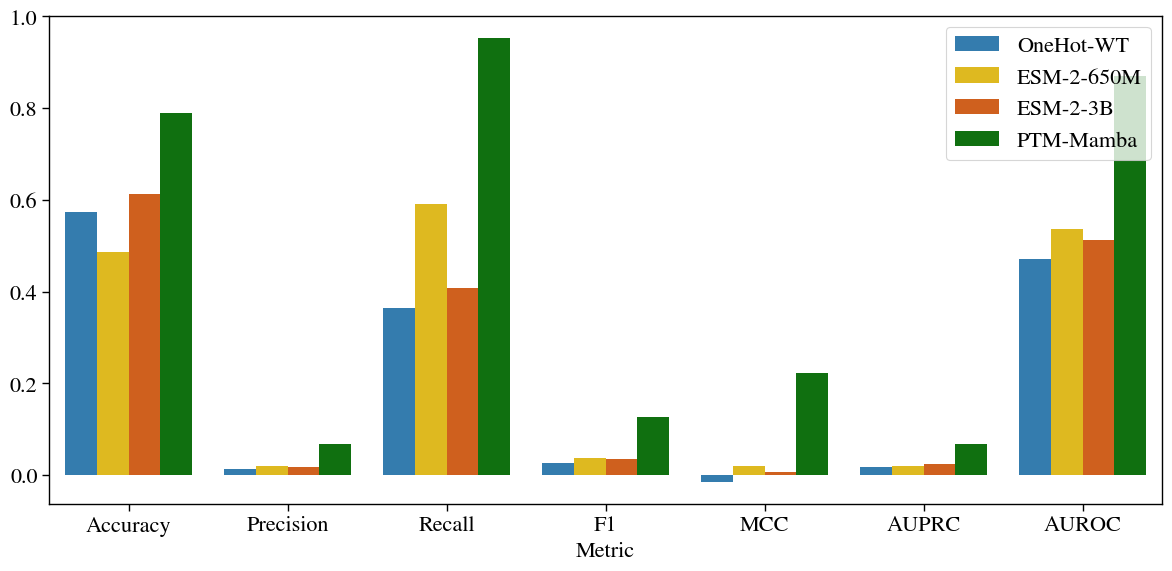

In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plot_settings = {'ytick.labelsize': 16,
                        'xtick.labelsize': 16,
                        'font.size': 22,
                        'figure.figsize': (8, 5),
                        'axes.titlesize': 22,
                        'axes.labelsize': 18,
                        'lines.linewidth': 2,
                        'lines.markersize': 3,
                        'legend.fontsize': 11,
                        'mathtext.fontset': 'stix',
                        'font.family': 'STIXGeneral'}
plt.style.use(plot_settings)
# Set the seaborn style and font scale for publication
# Set the seaborn style and font scale for publication
# sns.set(style="whitegrid", font_scale=1.2, )
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16})


# Define the paths to the result files
result_paths = ['one_hot_test_metrics.csv', 'esm650m_test_metrics.csv', 'esm3b_metrics.csv', 'ptm_mamba_test_metrics.csv']

# Define the names of the methods
method_names = ['OneHot-WT', 'ESM-2-650M', 'ESM-2-3B', 'PTM-Mamba']

# Define the metrics to plot
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1', 'MCC', 'AUPRC', 'AUROC']

# Define the color map for each method
color_map = {
    'OneHot-WT': '#207fc2',
    'ESM-2-650M': '#fecc00',
    'ESM-2-3B': '#EC5800',
    'PTM-Mamba': '#008000'
}

# Initialize a dictionary to store the average metrics for each method
average_metrics = {method: {} for method in method_names}

# Function to extract numeric value from a tensor string
def extract_numeric(value):
    if isinstance(value, str) and value.startswith('tensor('):
        return float(value[7:-1])
    return value

# Read each result file and calculate the average metrics
for path, method in zip(result_paths, method_names):
    df = pd.read_csv(path)
    # Rename the columns to match the metrics
    df.rename(columns={'accuracy': 'Accuracy', 'precision': 'Precision', 'recall': 'Recall', 'f1': 'F1', 'mcc': 'MCC', 'auprc': 'AUPRC', 'auroc': 'AUROC'}, inplace=True)
    
    for metric in metrics_to_plot:  # Only consider the specified metrics
        df[metric] = df[metric].apply(extract_numeric)  # Convert tensor strings to numeric values
        average_metrics[method][metric] = df[metric].mean()

# Convert the dictionary to a DataFrame for easier plotting
metrics_df = pd.DataFrame(average_metrics).reset_index().melt(id_vars='index', var_name='Method', value_name='Value')
metrics_df.rename(columns={'index': 'Metric'}, inplace=True)
metrics_df = metrics_df[metrics_df['Metric'].isin(metrics_to_plot)]  # Filter the DataFrame to include only the specified metrics

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Value', hue='Method', data=metrics_df, palette=color_map)
plt.xlabel('Metric')
plt.ylabel('')
# set a larger size for the x-axis labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.tight_layout()
plt.show()


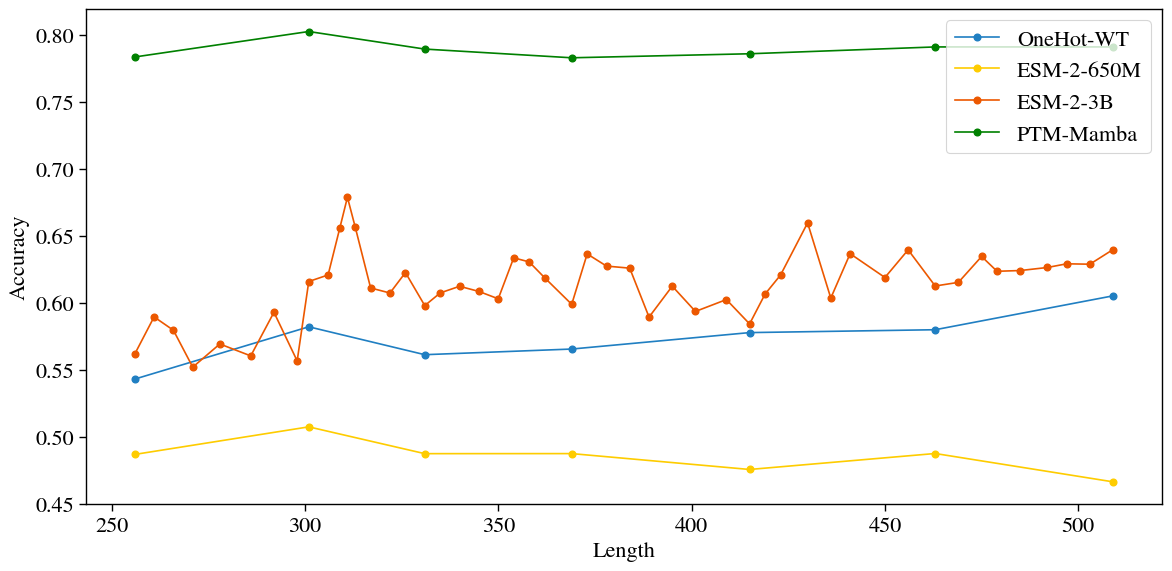

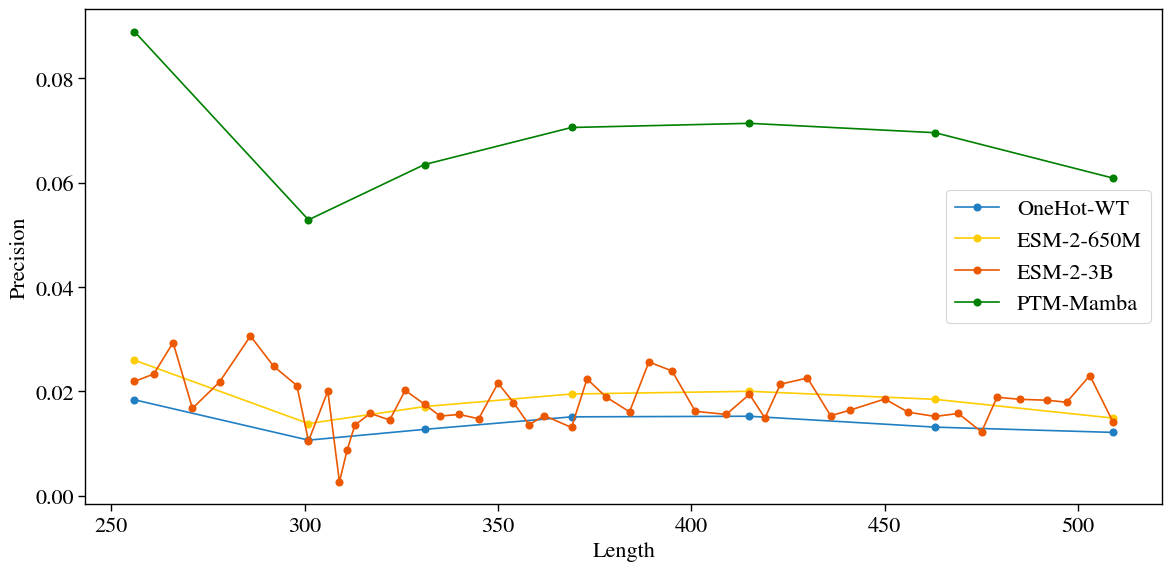

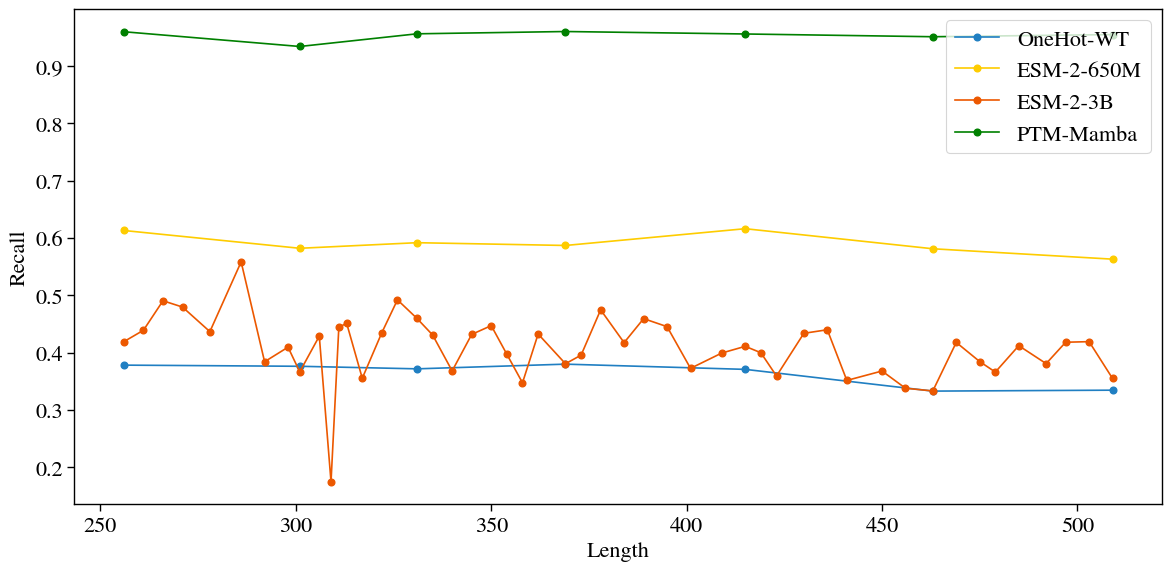

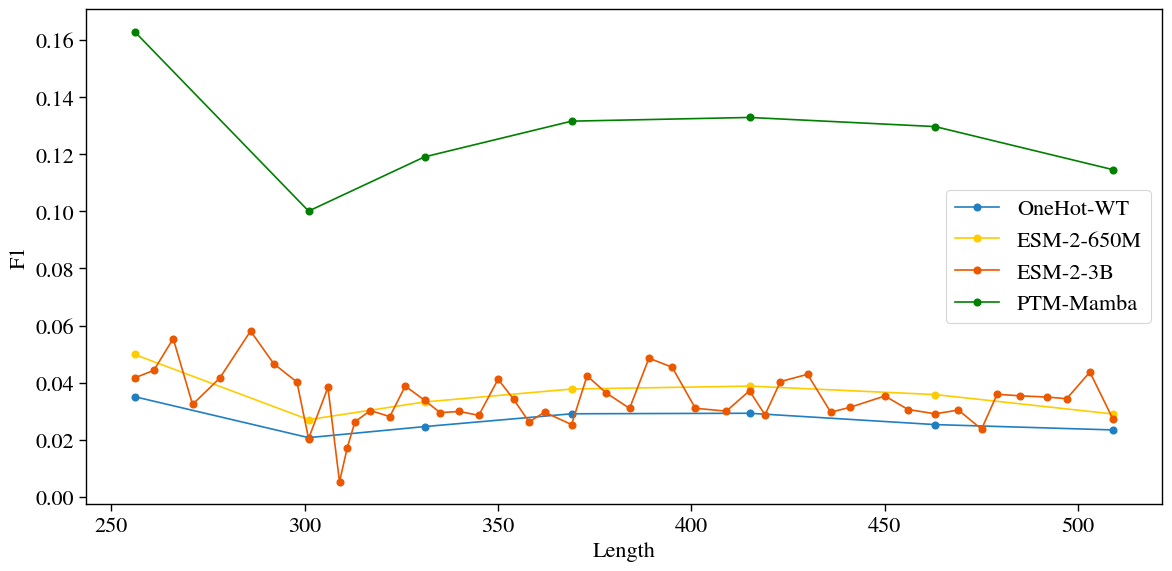

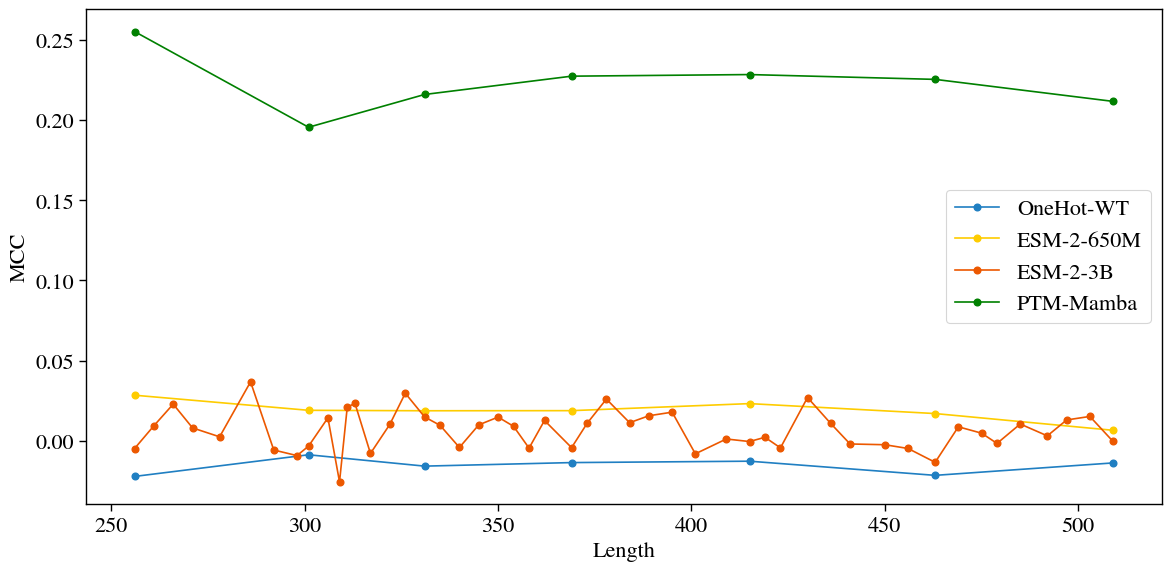

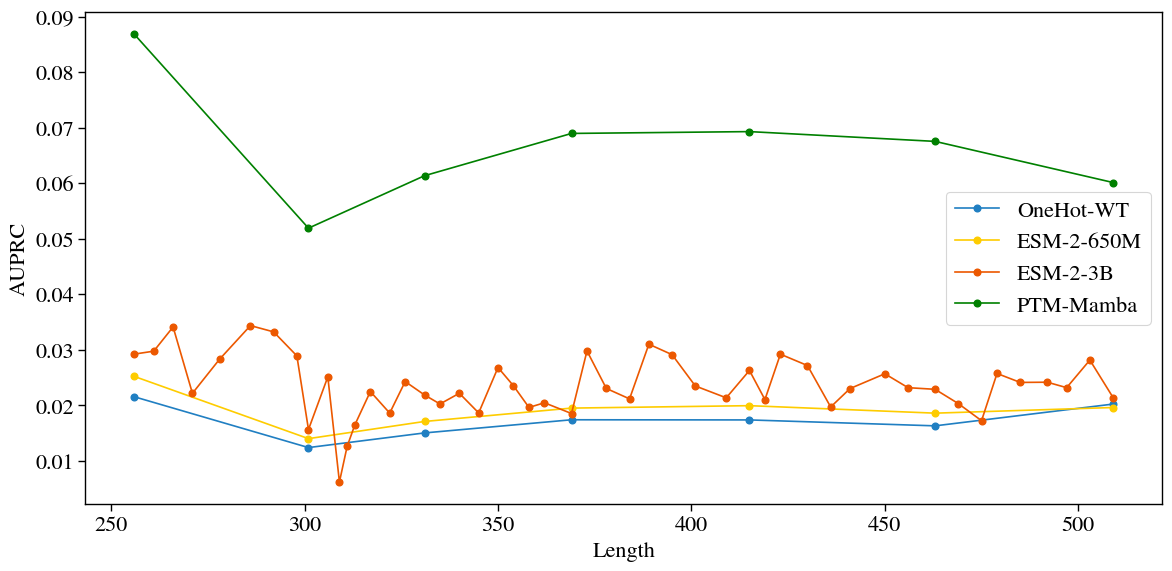

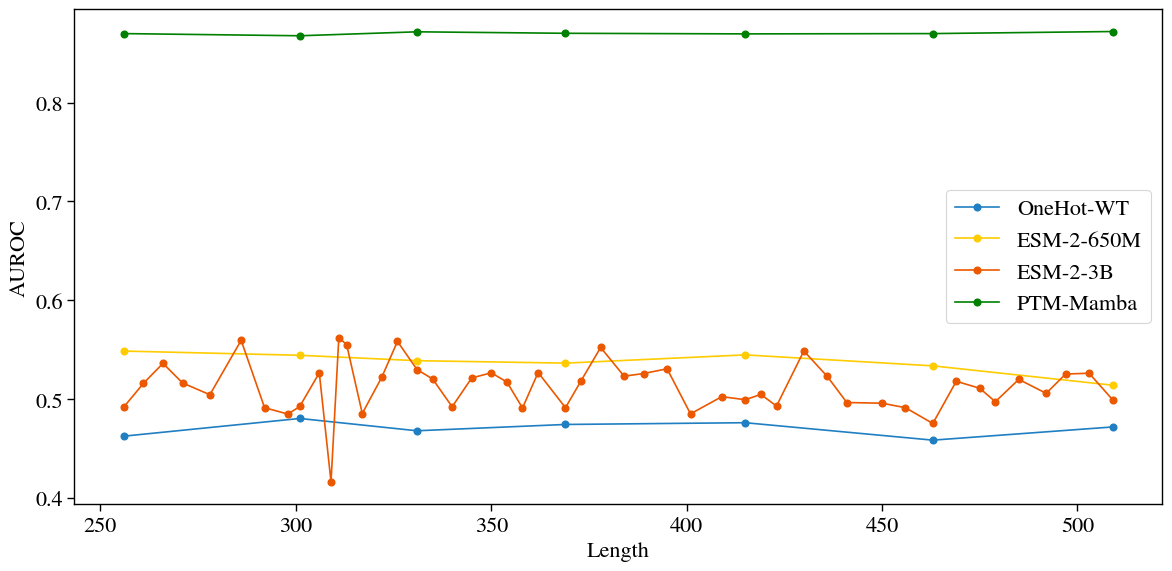

In [20]:
# Read each result file and plot the metrics
for metric in metrics_to_plot:
    plt.figure(figsize=(12, 6))
    for path, method in zip(result_paths, method_names):
        df = pd.read_csv(path)
        # Rename the columns to match the metrics
        df.rename(columns={'accuracy': 'Accuracy', 'precision': 'Precision', 'recall': 'Recall', 'f1': 'F1', 'mcc': 'MCC', 'auprc': 'AUPRC', 'auroc': 'AUROC'}, inplace=True)
        df[metric] = df[metric].apply(extract_numeric)  # Convert tensor strings to numeric values
        plt.plot(df['Length'], df[metric], label=method, color=color_map[method], marker='o')
    
    plt.xlabel('Length')
    plt.ylabel(metric)
    plt.legend(fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()
    plt.show()

In [8]:
# Convert the dictionary to a DataFrame for the table
metrics_table = pd.DataFrame(average_metrics).transpose()
metrics_table.index.name = 'Model Name'
metrics_table.columns.name = 'Metrics'

metrics_table.round(3)

Metrics,Accuracy,Precision,Recall,F1,MCC,AUPRC,AUROC
Model Name,,,,,,,
OneHot-WT,0.574,0.014,0.364,0.027,-0.015,0.017,0.470
ESM-2-650M,0.486,0.019,0.591,0.036,0.019,0.019,0.537
ESM-2-3B,0.613,0.018,0.409,0.034,0.007,0.024,0.512
PTM-Mamba,0.789,0.068,0.953,0.127,0.223,0.067,0.870
